In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [2]:
!unzip "/content/drive/MyDrive/Sign Language Project/BdSL_Word.zip"

Archive:  /content/drive/MyDrive/Sign Language Project/BdSL_Word.zip
   creating: Word/
   creating: Word/Color/
  inflating: Word/Color/color (1).jpg  
  inflating: Word/Color/color (10).jpg  
  inflating: Word/Color/color (11).jpg  
  inflating: Word/Color/color (12).jpg  
  inflating: Word/Color/color (13).jpg  
  inflating: Word/Color/color (14).jpg  
  inflating: Word/Color/color (15).jpg  
  inflating: Word/Color/color (16).jpg  
  inflating: Word/Color/color (17).jpg  
  inflating: Word/Color/color (18).jpg  
  inflating: Word/Color/color (19).jpg  
  inflating: Word/Color/color (2).jpg  
  inflating: Word/Color/color (20).jpg  
  inflating: Word/Color/color (21).jpg  
  inflating: Word/Color/color (22).jpg  
  inflating: Word/Color/color (23).jpg  
  inflating: Word/Color/color (24).jpg  
  inflating: Word/Color/color (25).jpg  
  inflating: Word/Color/color (26).jpg  
  inflating: Word/Color/color (27).jpg  
  inflating: Word/Color/color (28).jpg  
  inflating: Word/Color/colo

In [3]:
# input path for the images
base_path = '/content/Word'

In [4]:
SIZE=224
image_size = (SIZE, SIZE)
batch_size = 32
channels = 3
kernel = 4
stride = 1
pool = 2

(224, 224, 3)


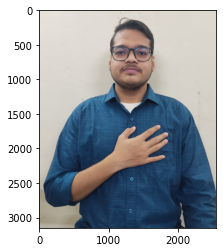

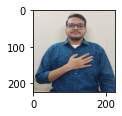

In [5]:
#show resized images
img = cv2.imread("/content/Word/Myself/myself (55).jpg")[:, :, ::-1]
width, height = SIZE, SIZE
resized_img = cv2.resize(img, (width, height))
plt.imshow(img)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(resized_img)
print(resized_img.shape)

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 992 files belonging to 10 classes.
Using 794 files for training.
Found 992 files belonging to 10 classes.
Using 198 files for validation.


In [7]:
class_names = train_ds.class_names
num_classes = len(class_names)
class_names

['Color',
 'Friend',
 'Myself',
 'Promise',
 'Request',
 'Salam',
 'Surprise',
 'They',
 'Think',
 'You']

In [8]:
labels = ['Color','Friend','Myself','Promise','Request','Salam','Surprise','They','Think','You']

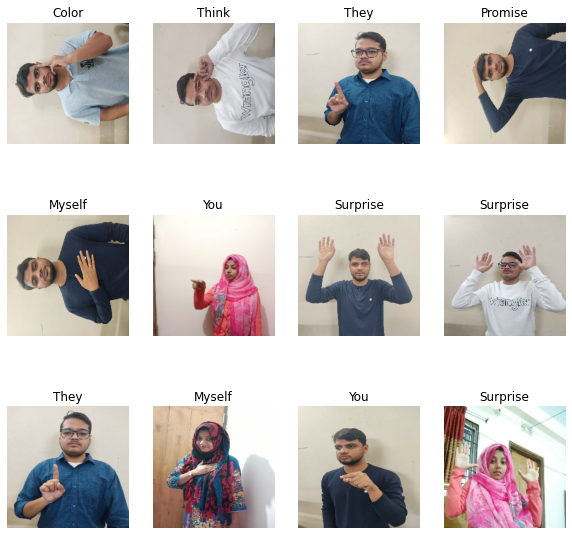

In [9]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in train_ds.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

##Model

In [10]:
classifier_resnet = resnet.ResNet50(input_shape= (224,224,3),include_top=False,weights='imagenet')
for layer in classifier_resnet.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 0s 0us/step


In [11]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=num_classes, activation='softmax')(classifier2)

model_resnet50 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model_resnet50.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 31.5 MB/s 


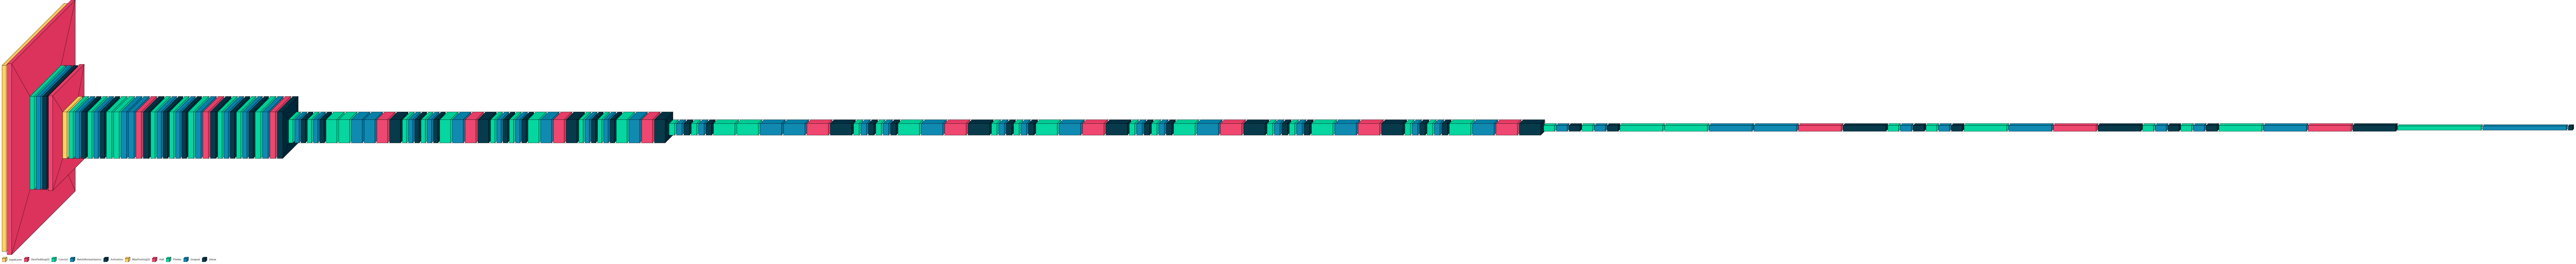

In [14]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("/content/drive/MyDrive/Sign Language Project/RobotoSlab-VariableFont_wght.ttf", 12)
visualkeras.layered_view(model_resnet50, legend=True, font=font)

In [18]:
history_resnet50 = model_resnet50.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
25/25 [==============================] - 32s 941ms/step - loss: 0.2496 - accuracy: 0.9798 - val_loss: 1.3909 - val_accuracy: 0.9192
Epoch 2/10
25/25 [==============================] - 31s 940ms/step - loss: 0.2529 - accuracy: 0.9849 - val_loss: 0.5588 - val_accuracy: 0.9545
Epoch 3/10
25/25 [==============================] - 31s 938ms/step - loss: 0.2833 - accuracy: 0.9811 - val_loss: 1.8146 - val_accuracy: 0.9444
Epoch 4/10
25/25 [==============================] - 31s 932ms/step - loss: 0.1065 - accuracy: 0.9874 - val_loss: 1.6280 - val_accuracy: 0.9242
Epoch 5/10
25/25 [==============================] - 31s 939ms/step - loss: 0.1939 - accuracy: 0.9874 - val_loss: 0.8649 - val_accuracy: 0.9596
Epoch 6/10
25/25 [==============================] - 31s 941ms/step - loss: 0.0510 - accuracy: 0.9912 - val_loss: 1.5065 - val_accuracy: 0.9394
Epoch 7/10
25/25 [==============================] - 31s 935ms/step - loss: 0.2664 - accuracy: 0.9874 - val_loss: 0.6637 - val_accuracy: 0.9646

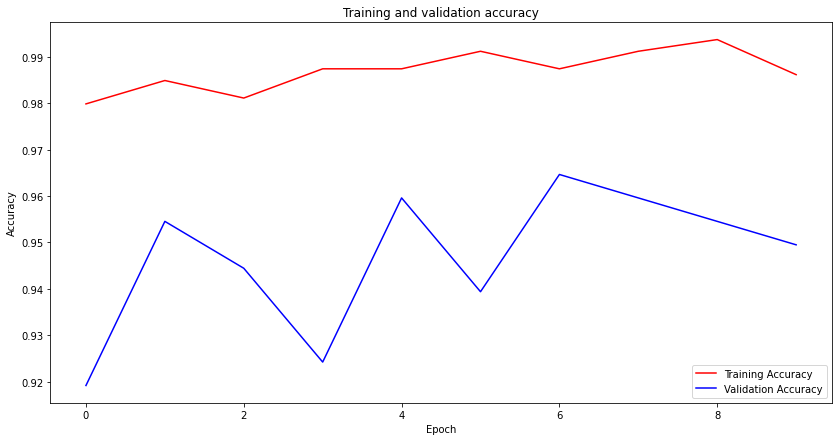

In [19]:
# Validation and Training accuracy plot
acc=history_resnet50.history['accuracy']
val_acc=history_resnet50.history['val_accuracy']
loss=history_resnet50.history['loss']
val_loss=history_resnet50.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

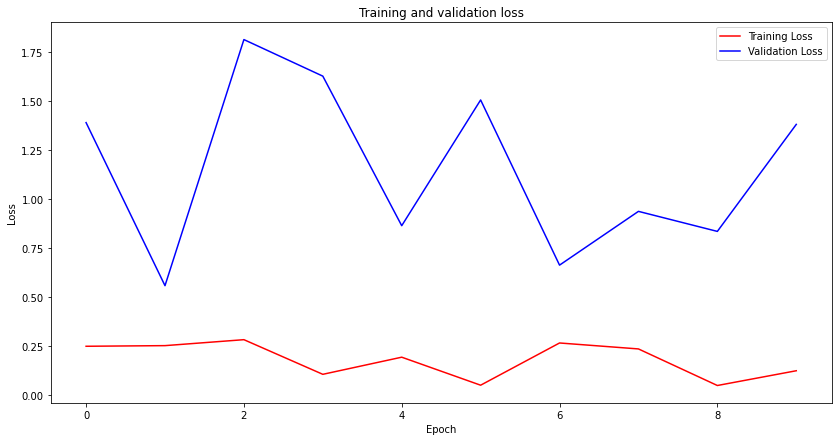

In [20]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [21]:
loss,val_accuracy = model_resnet50.evaluate(val_ds)
print('Accuracy on validation:', val_accuracy)

7/7 [==============================] - 6s 92ms/step - loss: 1.3818 - accuracy: 0.9495
Accuracy on validation: 0.9494949579238892


In [22]:
predict = model_resnet50.predict(val_ds)

##Confusion matrix

In [27]:
#generating true vector
y_true = np.random.randint(low=0, high=10, size=1000, dtype=int)

In [29]:
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

classes indexes: [0 1 2 3 4 5 6 7 8 9]


classes frequency: [ 97 105 103 104  96  99 100 101  90 105]


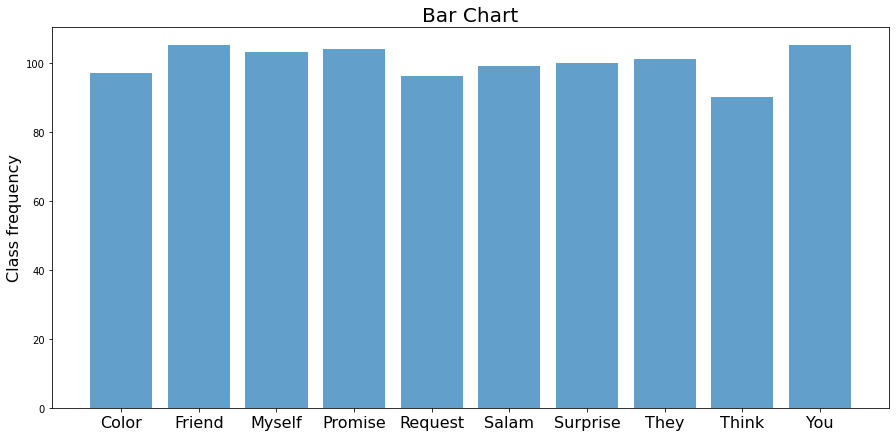

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.0)
figure = plt.figure()
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.7)
plt.ylabel('Class frequency', fontsize=16)
plt.xticks(classesIndexes, class_names, fontsize=16)
plt.title('Bar Chart', fontsize=20)
plt.show()

In [31]:
y_predicted = np.copy(y_true)

In [32]:
# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
print(ii)

[851 992 784 415 606 992  83 505 529 143 698 123 977 264 566 777 984 517
 678  84  31 918 241 640  51 541 730 525 405 226 469 716 392 266 177 159
 144 181 281 593 203 489  23 349 802   9 182 714   2 755  53 860 963 416
 404 363 416 984 842 771 642 634 714 329 942 641 796 453 669 240 777 678
 198 534 371 420 699 840 227 535 508 419 312 936 566 981 680 389 729 292
 786  59 456 535 347  59 313 766 357  31 245 480 196 988 311 774 213 714
 588  58 285 703 232 164 603 637 211 724 638  42 415 670 358 641 419 410
 810 424 844 520 799 436 558 497 230 329 234 167 531 920  43 415 106 694
 645 649 415 635 269 155 891 486 718 472 328 248 495 938 723 330 544 972
 321 262   6 350  66 266 993 543 739 309 601 728 401  11  47 422 992 926
 999 237 443 694 265 236 896  35 376 595 730 993 242 584 920 587  58  83
 369 531 491   9 969 888 702 781 337  31 560 586 900 169 671 999 444 938
 146 278 862   2 113 968  66 574 602  73 758   8 402 134 179 838 982 239
 581 381 155 551 590 198 639 522 388 714 834  31 14

In [33]:
# Iterating chosen indexes and replacing them with other classes' indexes
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.
          format(i, y_true[i], y_predicted[i]))

index = 851, True class => 0, 0 <= Predicted class
index = 992, True class => 5, 1 <= Predicted class
index = 784, True class => 5, 3 <= Predicted class
index = 415, True class => 2, 4 <= Predicted class
index = 606, True class => 0, 4 <= Predicted class
index = 992, True class => 5, 0 <= Predicted class
index = 83, True class => 5, 1 <= Predicted class
index = 505, True class => 8, 0 <= Predicted class
index = 529, True class => 6, 3 <= Predicted class
index = 143, True class => 0, 2 <= Predicted class
index = 698, True class => 9, 2 <= Predicted class
index = 123, True class => 4, 2 <= Predicted class
index = 977, True class => 4, 3 <= Predicted class
index = 264, True class => 7, 0 <= Predicted class
index = 566, True class => 0, 1 <= Predicted class
index = 777, True class => 8, 4 <= Predicted class
index = 984, True class => 2, 0 <= Predicted class
index = 517, True class => 6, 1 <= Predicted class
index = 678, True class => 3, 2 <= Predicted class
index = 84, True class => 1, 1 <

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
c_m = confusion_matrix(y_true, y_predicted)
print(c_m)

[[80  6  2  6  3  0  0  0  0  0]
 [ 4 85  7  7  2  0  0  0  0  0]
 [ 4  3 85  9  2  0  0  0  0  0]
 [ 3  6  2 89  4  0  0  0  0  0]
 [ 2  2  6  5 81  0  0  0  0  0]
 [ 0  6  4  4  3 82  0  0  0  0]
 [ 5  6  4  3  6  0 76  0  0  0]
 [ 7  5  4  2  2  0  0 81  0  0]
 [ 3  4  4  4  2  0  0  0 73  0]
 [ 3  8  3  8  5  0  0  0  0 78]]


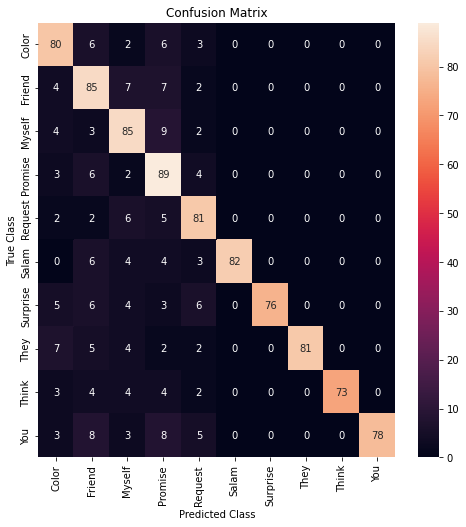

In [35]:
import seaborn as sns
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(c_m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()